# Social Engagement, Followers, and Subscribers Analysis

Social media plays a vital role in our daily lives. Whether for entertainment purposes, social interaction, or other reasons, social media keeps us connected with the world. With more and more social media platforms and data available, we can begin to study user behaviors and find the underlying connections with different social media platforms. This data analysis aims to compare the social interaction to follower or subscriber data across social media platforms (Instagram, YouTube, TikTok). We want to understand the relationship between followers or subscribers, social engagement, and influencer category.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy as sp
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

#### Reading and importing csv files

In [2]:
df_Insta = pd.read_csv('instagram.csv')
df_Tiktok = pd.read_csv('social media influencers - tiktok.csv')
df_Youtube = pd.read_csv('social media influencers - youtube.csv')

#Setting the limits of row to be display
pd.set_option('display.max_rows', None)

#### Declare a BoxCoX function to transform skewed data

In [3]:
#Declaring a Boxcox function that would trasfrom the data of a given column in the dataframe
def Boxcox(df, feature):
    skew = sp.stats.boxcox(df[feature])[0]
    skew_list = list(skew)
    return skew_list


# Exploratory Analysis

#### Renaming columns for consistency


In [4]:
display(df_Youtube.head(1))
display(df_Insta.head(1))
display(df_Tiktok.head(1))

,youtuber name,channel name,Category,Subscribers,Audience Country,avg views,avg likes,avg comments
0,tseries,T-Series,Music & Dance,212.1M,India,323.7K,9.8K,290


,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K


,Tiktoker name,Tiktok name,Subscribers count,Views avg.,Likes avg,Comments avg.,Shares avg
0,ekin.721,MOMO’s,221.7K,26M,2.8M,29.4K,116.4K


In [5]:
df_Youtube.rename(columns = {'Category':'Genre', 'avg views': 'Views', 'avg likes': 'Likes', 
                             'avg comments':'Comments'}, inplace = True)
df_Insta.columns = ['Influencer name','Instagram name', 'Genre', 'Sub Genre', 'Followers', 'Audience Country',
                   'Authentic Engagement','Engagement']
df_Tiktok.rename(columns = {'Subscribers count':'Subscribers', 'Views avg.': 'Views', 'Likes avg':'Likes',
                           'Comments avg.':'Comments', 'Shares avg':'Shares'}, inplace = True)

#### Displaying Non-Null count and data type of each feature

In [6]:
#Display the dataframe information, including non-null count and datatype
print ("-"*20, "Youtube", "-"*20)
print(df_Youtube.info())
print ("-"*20, "Instagram", "-"*20)
print(df_Insta.info())
print ("-"*20, "TikTok", "-"*20)
print(df_Tiktok.info())



-------------------- Youtube --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   youtuber name     1000 non-null   object
 1   channel name      1000 non-null   object
 2   Genre             723 non-null    object
 3   Subscribers       1000 non-null   object
 4   Audience Country  839 non-null    object
 5   Views             1000 non-null   object
 6   Likes             962 non-null    object
 7   Comments          791 non-null    object
dtypes: object(8)
memory usage: 62.6+ KB
None
-------------------- Instagram --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Influencer name       1000 non-null   object
 1   Instagram name        979 n

### Checking for Duplicates

In [7]:
print("Total duplicates in youtuber name: ",df_Youtube['youtuber name'].duplicated().sum())
print("Total duplicates in Infleuncer name: ",df_Insta['Influencer name'].duplicated().sum())
print("Total duplicates in Tiktoker name: ",df_Tiktok['Tiktoker name'].duplicated().sum())

Total duplicates in youtuber name:  2
Total duplicates in Infleuncer name:  3
Total duplicates in Tiktoker name:  13


In [8]:
youtube_duplicate = df_Youtube[df_Youtube['youtuber name'].duplicated(keep = False)].sort_values('youtuber name')
instagram_duplicate = df_Insta[df_Insta['Influencer name'].duplicated(keep = False)].sort_values('Influencer name')
tiktok_duplicate = df_Tiktok[df_Tiktok['Tiktoker name'].duplicated(keep = False)].sort_values('Tiktoker name')

print(f"Duplicated youtuber names:")
display(youtube_duplicate)
print(f"Duplicated Instagram Influencer names:")
display(instagram_duplicate)
print(f"Duplicated Tiktoker names:")
display(tiktok_duplicate)

Duplicated youtuber names:


,youtuber name,channel name,Genre,Subscribers,Audience Country,Views,Likes,Comments
549,ETV Jabardasth,ETV Jabardasth,NaN,12.5M,India,192.6K,2.7K,44
550,ETV Jabardasth,ETV Jabardasth,NaN,12.5M,India,192.6K,2.7K,44
223,PrestonPlayz,Preston,Animation,19.4M,United States,2.8M,68.6K,3.6K
558,PrestonPlayz,PrestonPlayz,Video games,12.5M,United States,2.1M,48.8K,4K


Duplicated Instagram Influencer names:


,Influencer name,Instagram name,Genre,Sub Genre,Followers,Audience Country,Authentic Engagement,Engagement
63,angelinajolie,Angelina Jolie,NaN,NaN,12.6M,Brazil,274.6K,456.2K
64,angelinajolie,Angelina Jolie,Lifestyle,NaN,12.6M,Brazil,274.6K,456.1K
458,justinbieber,Justin Bieber,Music,NaN,227M,India,439.1K,638.2K
459,justinbieber,Justin Bieber,Music,NaN,227.4M,India,314.2K,445.3K
692,nobru,Bruno Goes 🎭,NaN,NaN,13.2M,NaN,0,350.2K
693,nobru,Bruno Goes 🎭,Machinery & Technologies,Computers & Gadgets,13.2M,NaN,0,350.1K


Duplicated Tiktoker names:


,Tiktoker name,Tiktok name,Subscribers,Views,Likes,Comments,Shares
300,arigameplays,AriGameplays,19.3M,2.6M,444.6K,4.5K,915
298,arigameplays,AriGameplays,19.3M,2.6M,444.6K,4.5K,915
79,cleanpuppy,Chloe Cherry,1.7M,4.8M,980.2K,5.7K,2.9K
326,cleanpuppy,Chloe Cherry,1.7M,3.6M,617.4K,1.7K,612
49,conormaynard,Conor Maynard,6.2M,5.8M,794.3K,8.9K,6.6K
50,conormaynard,Conor Maynard,6.2M,5.8M,794.3K,8.9K,6.6K
199,elrodcontreras,ROD🥴,40.1M,3.3M,521K,4.8K,1K
202,elrodcontreras,ROD🥴,40.1M,3.3M,521K,4.8K,1K
952,jamescharles,James Charles,36.1M,1.7M,191.6K,2.2K,752
949,jamescharles,James Charles,36.1M,1.7M,191.6K,2.2K,752


These are the lists of all of the duplciates influencer's username accross Youtube, Instagram, and Tiktok. A large percentage of these duplicates users contains the same values across each columns.

#### Dropping all duplicates users except the  first row of each duplciated name

In [9]:
df_tiktok = df_Tiktok.drop_duplicates(subset = ['Tiktoker name'], keep = 'first')
df_insta = df_Insta.drop_duplicates(subset = ['Influencer name'], keep = 'first')
df_youtube = df_Youtube.drop_duplicates(subset = ['youtuber name'], keep = 'first')

display(df_tiktok['Tiktoker name'].duplicated().sum())
display(df_youtube['youtuber name'].duplicated().sum())
display(df_insta['Influencer name'].duplicated().sum())

0

0

0

### Dropping Null-values in social engagement features

In [10]:
#Dropping rows with NaN value for all numerical columns(variables)
df_youtube.drop(df_youtube[df_youtube['Likes'].isnull()].index,inplace = True)
df_youtube.drop(df_youtube[df_youtube['Comments'].isnull()].index, inplace = True)

### Converting social engagement features into interger or float object type

### Instagram

In [11]:
#Replacing the M and K string with 1e6 and 1e3, respectively, and convert 
# the columns into int dtype

df_insta['Followers']=df_insta['Followers'].replace({'M':'*1e6', 'K':'*1e3'},regex=True).map(pd.eval).astype(int)
df_insta['Authentic Engagement']=df_insta['Authentic Engagement'].replace({'M':'*1e6', 'K':'*1e3'},regex= True).map(pd.eval).astype(int)
df_insta['Engagement']=df_insta['Engagement'].replace({'M':'*1e6', 'K':'*1e3'}, regex = True).map(pd.eval).astype(int)

### Youtube

In [12]:
#Replacing the M and K string with 1e6 and 1e3, respectively, and convert 
# the columns into int dtype
df_youtube['Subscribers'] = df_youtube['Subscribers'].replace({'M':'*1e6', 'K':'*1e3'}, regex = True).map(pd.eval).astype(int)
df_youtube['Views'] = df_youtube['Views'].replace({'M':'*1e6', 'K':'*1e3'}, regex = True).map(pd.eval).astype(int)
df_youtube['Likes'] = df_youtube['Likes'].replace({'M':'*1e6', 'K':'*1e3'}, regex = True).map(pd.eval).astype(int)
df_youtube['Comments'] = df_youtube['Comments'].replace({'M':'*1e6', 'K':'*1e3'}, regex = True).map(pd.eval).astype(int)


### TIktok

In [13]:
#Replacing the M and K string with 1e6 and 1e3, respectively, and convert 
# the columns into int dtype

df_tiktok['Subscribers'] = df_tiktok['Subscribers'].replace({'M':'*1e6', 'K':'*1e3'}, regex = True).map(pd.eval).astype(int)
df_tiktok['Views'] = df_tiktok['Views'].replace({'M':'*1e6', 'K':'*1e3'}, regex = True).map(pd.eval).astype(int)
df_tiktok['Likes'] = df_tiktok['Likes'].replace({'M':'*1e6', 'K':'*1e3'}, regex = True).map(pd.eval).astype(int)
df_tiktok['Comments'] = df_tiktok['Comments'].replace({'M':'*1e6', 'K':'*1e3'}, regex = True).map(pd.eval).astype(int)
df_tiktok['Shares'] = df_tiktok['Shares'].replace({'M':'*1e6', 'K':'*1e3'}, regex = True).map(pd.eval).astype(int)


In [14]:
#Display the dataframe information, including non-null count and datatype
print ("-"*20, "Youtube", "-"*20)
print(df_youtube.info())
print ("-"*20, "Instagram", "-"*20)
print(df_insta.info())
print ("-"*20, "TikTok", "-"*20)
print(df_tiktok.info())

-------------------- Youtube --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   youtuber name     786 non-null    object
 1   channel name      786 non-null    object
 2   Genre             571 non-null    object
 3   Subscribers       786 non-null    int64 
 4   Audience Country  786 non-null    object
 5   Views             786 non-null    int64 
 6   Likes             786 non-null    int64 
 7   Comments          786 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 55.3+ KB
None
-------------------- Instagram --------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Influencer name       997 non-null    object
 1   Instagram name     

All of the social engagement features such as Likes, Views, Comments,Shares, Authentic Engagement, Engagement, Followers and Subscribers are now in the correct format we want for later analysis. All of the rows where social egnagement features contains null value are also remove.

# Data Analysis

### 1.Statistics for engagement for each social media platform

#### Instagram: Box Plot and Distribution Plots

Text(0.5, 1.0, 'Instagram')

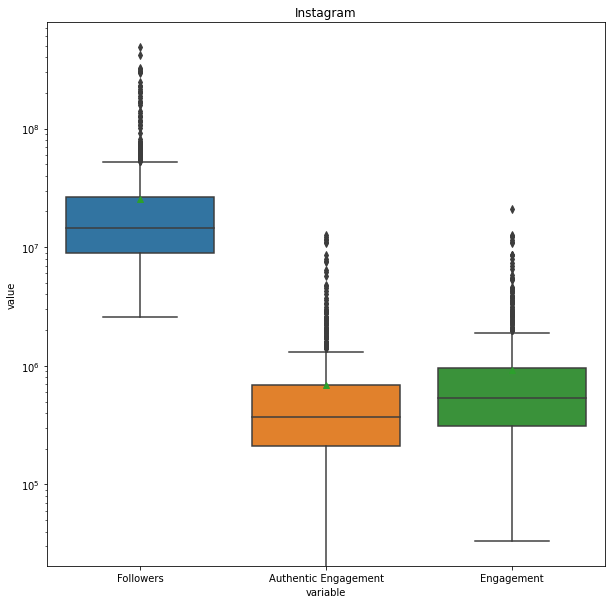

In [15]:
#More Box plot for the skewed data
mdf = pd.melt(df_insta[['Followers', 'Authentic Engagement','Engagement']])
plt.figure(figsize = (10,10))
sns.boxplot(x = 'variable', y='value', data = mdf, showmeans = True)
plt.yscale('log')
plt.title('Instagram')


#### Instagram: Using Boxcox to transform the skewed data into a normal distribution

In [16]:
#Only selecting the number that are bigger than 0 for Boxcox transform
insta_over0 = df_insta.loc[df_insta['Authentic Engagement']>0]

Text(0.5, 1.0, 'Instagram: Boxcox Transformation')

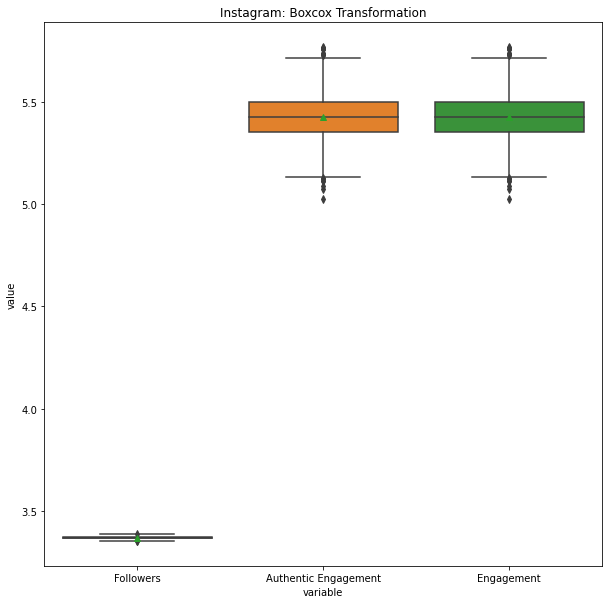

In [59]:
#Using Boxcox method to transform the skewed data for instagram

skew_Yfollow = Boxcox(df_insta, 'Followers')
skew_Yauthen = Boxcox(insta_over0, 'Authentic Engagement')
skew_yengage = Boxcox(df_insta, 'Engagement')
skew_Yf = pd.DataFrame(skew_Yfollow, columns = ['Followers'])
skew_Ya = pd.DataFrame(skew_Yauthen, columns = ['Authentic Engagement'])
skew_Ye = pd.DataFrame(skew_Yauthen, columns = ['Engagement'])

merge_skewInsta = pd.concat([skew_Yf, skew_Ya, skew_Ye], axis = 1, join = 'inner')
mf = pd.melt(merge_skewInsta[['Followers','Authentic Engagement','Engagement']])

plt.figure(figsize = (10,10))
sns.boxplot(x = 'variable', y='value', data = mf, showmeans = True)
#plt.yscale('log')
plt.title('Instagram: Boxcox Transformation')


#### Youtube

Text(0.5, 1.0, 'Youtube')

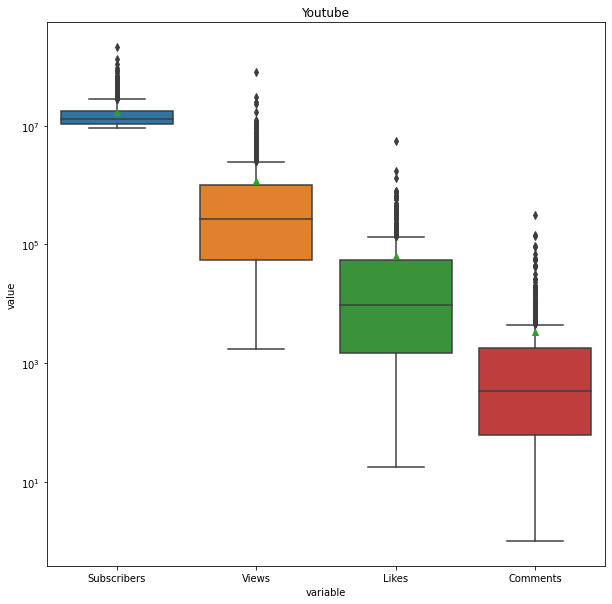

In [18]:
mf_youtube = pd.melt(df_youtube[['Subscribers','Views','Likes','Comments']])
plt.figure(figsize = (10,10))
sns.boxplot(x = 'variable', y='value', data = mf_youtube, showmeans = True)
plt.yscale('log')
plt.title('Youtube')



#### Youtube: Using Boxcox to transform the skewed data into a normal distribution

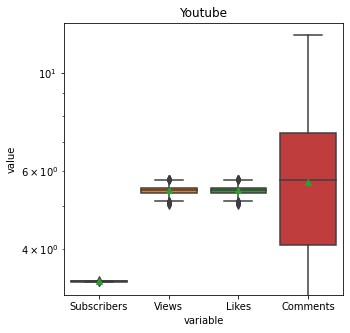

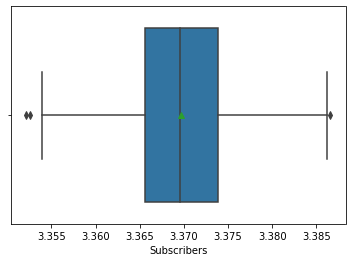

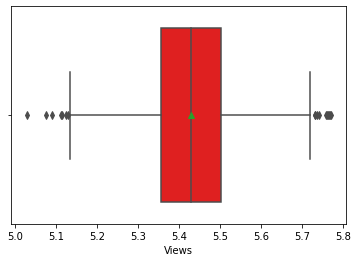

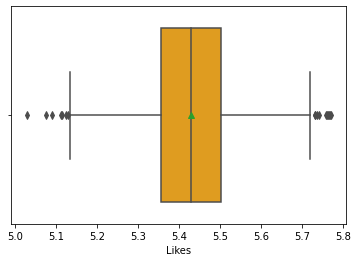

<AxesSubplot:xlabel='Comments'>

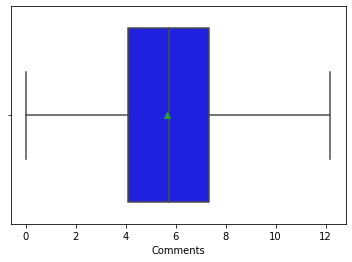

In [19]:
#Using Boxcox method to transform the youtube into a normal distribution and create
# box plots

skew_Ysub = Boxcox(df_youtube, 'Subscribers')
skew_Yview = Boxcox(df_youtube, 'Views')
skew_ylikes = Boxcox(df_youtube, 'Likes')
skew_Ycomment = Boxcox(df_youtube, 'Comments')
skew_YS = pd.DataFrame(skew_Yfollow, columns = ['Subscribers'])
skew_YV = pd.DataFrame(skew_Yauthen, columns = ['Views'])
skew_YL = pd.DataFrame(skew_Yauthen, columns = ['Likes'])
skew_YC = pd.DataFrame(skew_Ycomment, columns = ['Comments'])

merge = pd.concat(( skew_YS, skew_YV, skew_YL, skew_YC), axis = 1)
df = pd.melt(merge[['Subscribers','Views', 'Likes', 'Comments']])
plt.figure(figsize = (5,5))
sns.boxplot(x = 'variable', y='value', data = df, showmeans = True)
plt.yscale('log')
plt.title('Youtube')
plt.show()

sns.boxplot(x = 'Subscribers', data = skew_YS, showmeans = True)
plt.show()
sns.boxplot(x = 'Views', data = skew_YV, showmeans = True, color = 'red')
plt.show()
sns.boxplot(x = 'Likes', data = skew_YL, showmeans = True, color = 'orange')
plt.show()
sns.boxplot(x = 'Comments', data = skew_YC, showmeans = True, color = 'blue')


#### TIktok

Text(0.5, 1.0, 'TikTok')

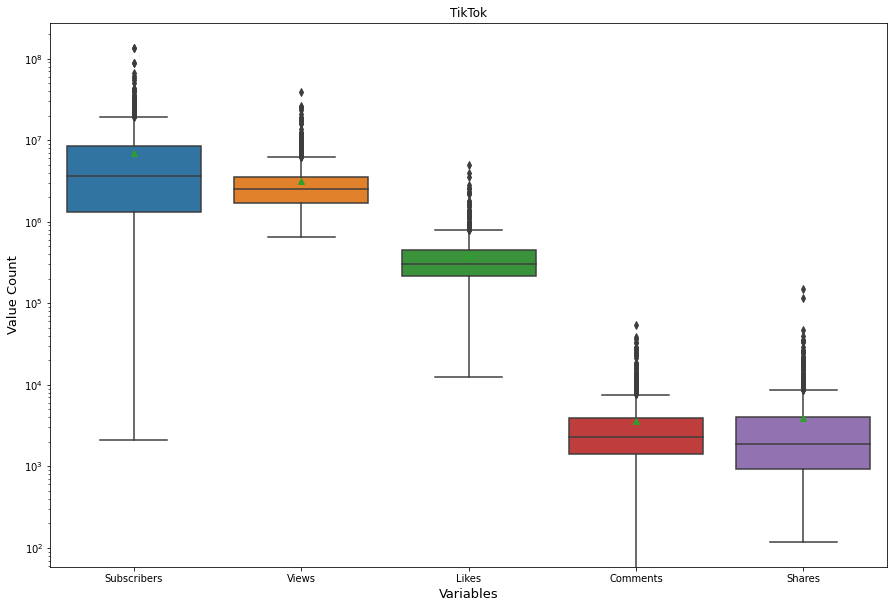

In [20]:
mdf_tiktok = pd.melt(df_tiktok[['Subscribers', 'Views','Likes','Comments', 'Shares']])
plt.figure(figsize = (15,10))
sns.boxplot(x = 'variable', y='value', data = mdf_tiktok, showmeans = True)
plt.xlabel('Variables',fontsize = 13)
plt.ylabel('Value Count',fontsize = 13)
plt.yscale('log')
plt.title('TikTok')

#### TikTok: Using Boxcox to transform the skewed data into a normal distribution

In [21]:
comment_nonzero = df_tiktok.loc[df_tiktok['Comments'] > 0]

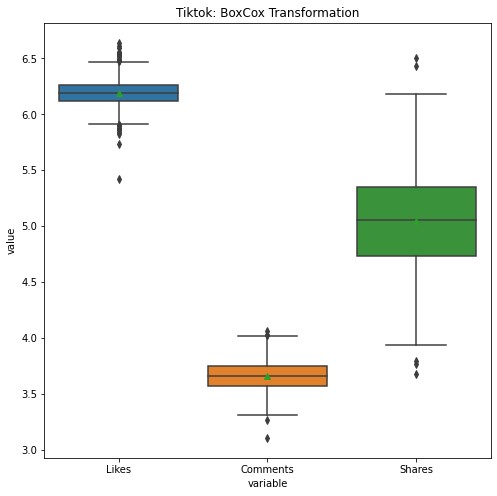

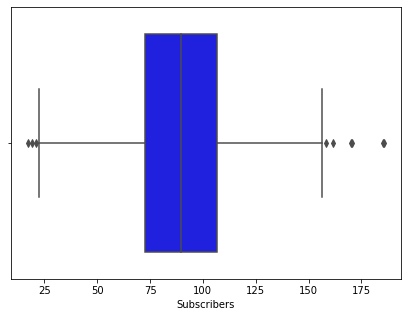

<AxesSubplot:xlabel='Views'>

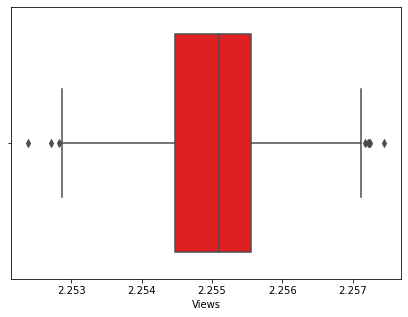

In [60]:
#Using Boxcox method to transform the TikTok data into a normal distribution
# and plot its box plot

skew_Tsub = Boxcox(df_tiktok, 'Subscribers')
skew_Tview = Boxcox(df_tiktok, 'Views')
skew_Tlikes = Boxcox(df_tiktok, 'Likes')
skew_Tcomment = Boxcox(comment_nonzero, 'Comments')
skew_Tshares = Boxcox(df_tiktok, 'Shares')
skew_TS = pd.DataFrame(skew_Tsub, columns = ['Subscribers'])
skew_TV = pd.DataFrame(skew_Tview, columns = ['Views'])
skew_TL = pd.DataFrame(skew_Tlikes, columns = ['Likes'])
skew_TC = pd.DataFrame(skew_Tcomment, columns = ['Comments'])
skew_TSH = pd.DataFrame(skew_Tshares, columns = ['Shares'])

merge = pd.concat((skew_TL,skew_TC,skew_TSH), axis = 1)
df = pd.melt(merge[['Likes', 'Comments','Shares']])
plt.figure(figsize = (8,8))
sns.boxplot(x = 'variable', y='value', data = df, showmeans = True)
#plt.yscale('log')
plt.title('Tiktok: BoxCox Transformation')
plt.show()

plt.figure(figsize = (7,5))
sns.boxplot(x = 'Subscribers', data = skew_TS, color = 'Blue')
plt.show()

plt.figure(figsize = (7,5))
sns.boxplot(x = 'Views', data = skew_TV, color = 'red')

**Insights:** The data distribution of social engagement features, followers, and subscribers are not normally distributed. The skewed data set can be seen in the box plots under each social media platform before the transformation. Boxcox transformation does an excellent job transforming the data to be normally distributed. Normally distributed data allows us to assume that the errors are also normally distributed. This allows us to construct confidence intervals and conduct hypothesis testing. 

### 2.What social interaction (such as likes, views, and comments) and genre have the highest correlation with total subscribers?

### Instagram

In [23]:
#Display unique genre
df_insta['Genre'].unique()

array(['Sports with a ball', 'Music', 'Shows', 'Lifestyle', nan,
       'Humor & Fun & Happiness', 'Cinema & Actors/actresses', 'Beauty',
       'Clothing & Outfits', 'Fashion', 'Modeling', 'Food & Cooking',
       'Family', 'Fitness & Gym', 'Computers & Gadgets', 'Art/Artists',
       'Finance & Economics', 'Cars & Motorbikes', 'Photography',
       'Racing Sports', 'Literature & Journalism', 'Business & Careers',
       'Animals', 'Nature & landscapes', 'Adult content',
       'Accessories & Jewellery', 'Education', 'Management & Marketing',
       'Luxury', 'Science', 'Kids & Toys'], dtype=object)

##### Correlation Matrix: Grouping by genre vs non-grouppping by genre

,Followers,Authentic Engagement,Engagement
Followers,1.000000,0.249794,0.273042
Authentic Engagement,0.249794,1.000000,0.965710
Engagement,0.273042,0.965710,1.000000


,Followers,Authentic Engagement,Engagement
Followers,1.000000,0.971229,0.970985
Authentic Engagement,0.971229,1.000000,0.999678
Engagement,0.970985,0.999678,1.000000


Text(0.5, 1.0, 'Group by Genre')

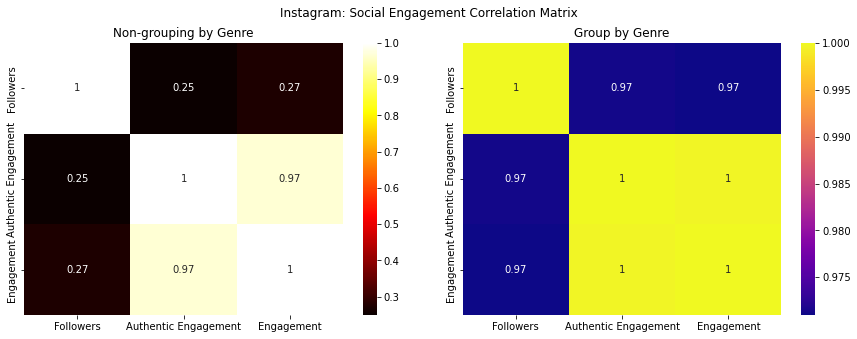

In [24]:
#Find the total engagement by each unique genre

genre_count = df_insta.groupby('Genre')['Genre'].count()
genre_engage = df_insta.groupby('Genre')[['Genre','Followers','Authentic Engagement','Engagement']].sum()
genre_engage.reset_index(drop = False,inplace = True)
genre_engage.rename(columns = {'Genre':'Genre'}, inplace = True)
genre_engage.sort_values('Followers', ascending = False,inplace= True)

#Displaying the correlation table
display(df_insta.corr(),genre_engage.corr())

#mask = np.ones_like(insta_corr, dtype = np.bool)
#mask = np.triu(mask)

fig, (ax1,ax2) = plt.subplots(ncols =2, figsize = (15,5) )
fig.subplots_adjust(wspace=0.1)
fig.suptitle('Instagram: Social Engagement Correlation Matrix')

sns.heatmap(df_insta.corr(), cmap = "hot", annot = True, ax=ax1,cbar = True)
ax1.set_title('Non-grouping by Genre')

sns.heatmap(genre_engage.corr(), cmap = "plasma", annot = True, ax=ax2,cbar = True)
ax2.set_title('Group by Genre')



### Youtube

In [25]:
#Correlation table for youtube data set
youtube_corr = df_youtube.corr()

#### Grouping by Video Types and calculate the total Social Interaction

In [26]:
youtube_genre = df_youtube.groupby('Genre')['Genre'].count()
youtube_genCount = df_youtube.groupby('Genre')[['Genre','Subscribers','Views','Likes','Comments']].sum()
youtube_genCount.reset_index(drop = False,inplace = True)
#genre_engage.rename(columns = {'category_1':'Video Type'}, inplace = True)
youtube_genCount.sort_values('Subscribers', ascending = False,inplace= True)


#### Youtube Correlation Matrix without grouping by genre

Text(0.5, 1.0, 'Group by Genre')

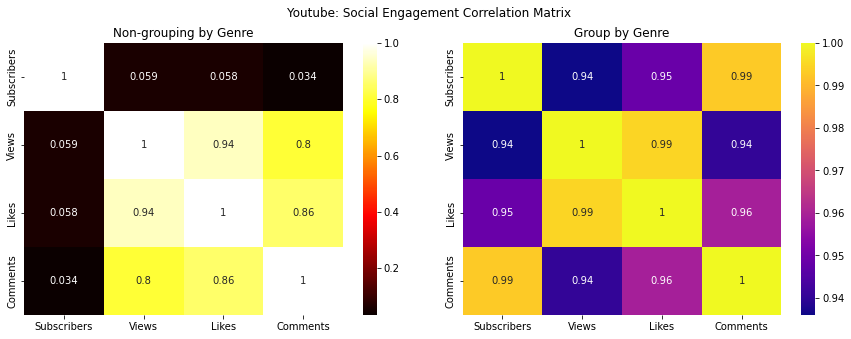

In [27]:
#mask = np.ones_like(youtube_corr, dtype = np.bool)
#mask = np.triu(mask)

fig, (ax1,ax2) = plt.subplots(ncols =2, figsize = (15,5) )
fig.subplots_adjust(wspace=0.1)
fig.suptitle('Youtube: Social Engagement Correlation Matrix')

sns.heatmap(df_youtube.corr(), cmap = "hot", annot = True, ax=ax1,cbar = True)
ax1.set_title('Non-grouping by Genre')

sns.heatmap(youtube_genCount.corr(), cmap = "plasma", annot = True, ax=ax2,cbar = True)
ax2.set_title('Group by Genre')



### TikTok

In [28]:
tiktok_corr = df_tiktok.corr()

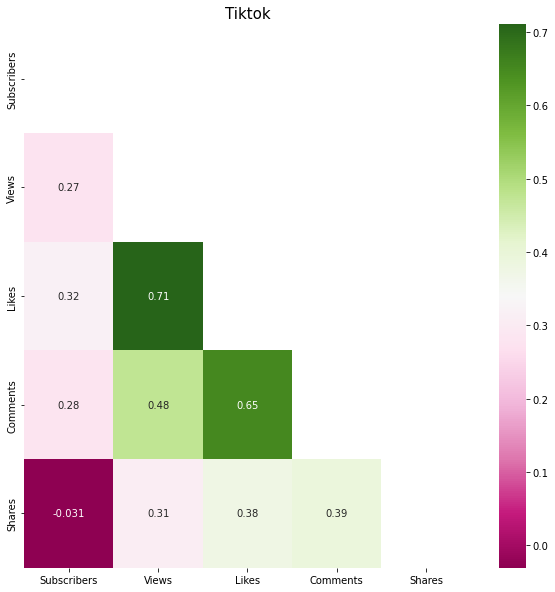

In [29]:
#Create a corelation matrix 
mask = np.ones_like(tiktok_corr, dtype = np.bool)
mask = np.triu(mask)
plt.figure(figsize= (10,10))
sns.heatmap(tiktok_corr, annot = True, mask = mask, cmap = 'PiYG')
plt.title('Tiktok', fontsize = 15)
plt.show()



**Insights:** Youtube and Instagram datasets contain genre and sub-genre features. Each influencer is classified into a specific genre; in some cases, they are further classified into sub-genres. The observation of the correlation matrix between features on Youtube, Instagram, and TikTok is as follows:

1. **Instagram:** There are two correlation matrices. The first matrix contains the correlation coefficient for a dataset not grouped by its genre. The second matrix contains correlation coefficients for a dataset grouped by genre.
    > a. **Non-Groupping by genre:** Authentic engagement and Engagement features are highly correlated. However, the two stated features are not highly correlated to followers. This means that there is no linear relationship between TikTok's social engagement features and its followers. <br>
    > b. **Groupping by genre:** The sum of social engagement features under each genre is taken to calculate the correlation coefficient. Consequently, this reduces the dataset size so significantly that the correlation coefficients between social engagement features and followers are highly correlated. This correlation is an incorrect interpretation of the features' linear relationship, given the small sample size. Therefore, we cannot make any generalizations or assumptions that the correlation coefficient is correct.
2. **Youtube:** There are two correlation matrices. The first matrix contains the correlation coefficient for a dataset not grouped by its genre. The second matrix contains correlation coefficients for a dataset grouped by genre.
    > a. **Non-Groupping by genre:** All social engagement features, such as views, likes, and comments, are highly correlated. People who view the influencer's content on Youtube tend to like the post. However, there is no correlation between social engagement and subscribers.<br>
    > b. **Groupping by genre:** All of the social engagement features and subscribers are highly correlated. However, the total rows of the data are the same as the count of the unique genre. Consequently, the correlation coefficient is high between all features. This correlation is an incorrect interpretation of the features' linear relationship, given the small sample size. Therefore, we cannot make any generalizations or assumptions that the correlation coefficient is correct.
3. **TikTok:** The views and likes feature has the highest correlation. Likes and comments features are reasonably correlated at a value of 0.65. There is no linear relationship between social engagement features and their subscribers.

### 3. Is it safe to assume that the platform with the most social interaction on the post is the most popular social platform?

In [30]:
#Total social interaction of Youtube
min_length = np.min([len(df_youtube),len(df_tiktok),len(df_insta)])

youtube_engage = df_youtube[['Subscribers','Views', 'Likes','Comments']][:min_length].sort_values('Subscribers', ascending = False).sum()
tiktok_engage = df_tiktok[['Subscribers','Views', 'Comments','Shares']][:min_length].sort_values('Subscribers', ascending = False).sum()
insta_engage = df_insta[['Followers','Authentic Engagement','Engagement']][:min_length].sort_values('Followers', ascending = False).sum()

pop_youtube = pd.DataFrame(youtube_engage, columns = ['Youtube']).T
pop_tiktop = pd.DataFrame(tiktok_engage, columns = ['Tiktok']).T
pop_insta = pd.DataFrame(insta_engage, columns = ['Instagram']).T

display(pop_youtube, pop_tiktop, pop_insta)
#print(f'Total Social Interaction of Youtube, by features:\n{test}\n')
#print(f'Total Social Interaction of Tiktok, by features:\n{tiktok_engage}\n')
#print(f'Total Social Interaction of Instgram, by features:\n{insta_engage}\n')
#print(f'Most popular platform is {np.max((youtube_engage[0],tiktok_engage[0],insta_engage[0]))}')
df_youtube['Subscribers'].sum()


,Subscribers,Views,Likes,Comments
Youtube,13376699996,928812494,49053691,2644199


,Subscribers,Views,Comments,Shares
Tiktok,5593037185,2759981795,3156439,3484257


,Followers,Authentic Engagement,Engagement
Instagram,20338599985,511489298,690241998


13376699996

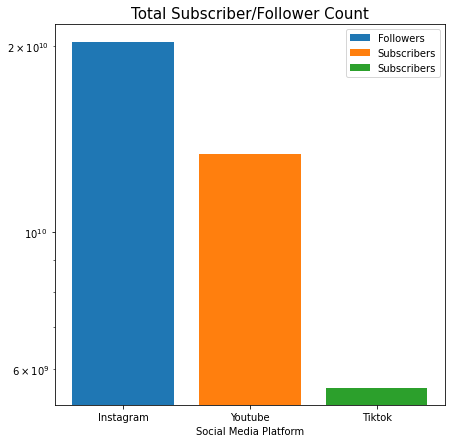

In [31]:
plt.figure(figsize = (7,7))
plt.bar(pop_insta.index[0],pop_insta['Followers'], label = 'Followers')
plt.bar(pop_youtube.index[0],pop_youtube['Subscribers'],label = ('Subscribers'))
plt.bar(pop_tiktop.index[0],pop_tiktop['Subscribers'], label = 'Subscribers')
plt.title('Total Subscriber/Follower Count', fontsize = 15)
plt.xlabel('Social Media Platform')
plt.yscale('log')
plt.legend()

**Insights:** For consistency purposes, I limit the total data point for all three social media platforms to the social platform with the smallest row count. In this case, the youtube data point only has 786 entries. If we only consider the total subscribers or followers as a measure of a popular platform, then Instagram is the most popular. However, remember that the total number of followers or subscribers across each platform will likely contain many duplicates. For example, a person could subscribe to multiple influencers on one or multiple social media platforms. Hence, the total Followers and Subscribers for the top 786 influencers are in the billions across each platform. 

### 4. What type of video on Instagram prompts the most Authentic Engagement?

In [32]:
authentic_feature = df_insta.groupby(['Genre','Sub Genre'])['Authentic Engagement'].sum().sort_values(ascending = False)
total_authentic = df_insta.groupby(['Genre'])['Authentic Engagement'].sum().sort_values(ascending = False)

#Pivot Table by category 1 and 2
group_table = pd.pivot_table(df_insta, index = ['Genre','Sub Genre'], values = ['Authentic Engagement'], aggfunc=np.sum)
group_table.sort_values(['Genre','Authentic Engagement'], ascending = True)


Authentic Engagement
Genre                     Sub Genre                                      
Accessories & Jewellery   Clothing & Outfits                        57900
Art/Artists               Shows                                    140200
                          Fashion                                  531700
                          Beauty                                   551000
                          Cinema & Actors/actresses                713500
Beauty                    Family                                   304800
                          Modeling                                 952900
                          Cinema & Actors/actresses               1245400
                          Lifestyle                               1489100
                          Art/Artists                             1700000
Cars & Motorbikes         Luxury                                   557200
Cinema & Actors/actresses Family                                    80800
                          Business & Careers                       174000
                          Fitness & Gym                            303400
                          Photography                              321000
                          Comics & sketches                        405600
                          Art/Artists                              474600
                          Humor & Fun & Happiness                  669100
                          Shows                                   1252600
                          Music                                   4246800
                          Lifestyle                               4825000
                          Fashion                                 6743400
                          Modeling                                8057200
Clothing & Outfits        Shopping & Retail                         52400
                          Music                                    871400
                          Lifestyle                               1986100
Computers & Gadgets       Photography                               83400
                          Machinery & Technologies                1684100
Education                 Humor & Fun & Happiness                  424200
Family                    Finance & Economics                           0
                          Fashion                                  368300
                          Shows                                    431800
                          Sports with a ball                       500400
                          Music                                    812100
                          Lifestyle                               2333100
Fashion                   Clothing & Outfits                        46200
                          Lifestyle                                505000
                          Cinema & Actors/actresses                650700
                          Beauty                                  2000000
                          Modeling                                8234200
Finance & Economics       Business & Careers                      1931500
Fitness & Gym             Shopping & Retail                        129500
                          Lifestyle                               1500000
Humor & Fun & Happiness   Lifestyle                                296500
                          Cinema & Actors/actresses                926400
                          Clothing & Outfits                       939800
Kids & Toys               Family                                   176400
Lifestyle                 Family                                    61500
                          Photography                              181900
                          Business & Careers                       208700
                          Sports with a ball                      1536200
                          Beauty                                  1606200
                          Art/Artists                    

#### Instagram: Total authentic engagement by each genre

In [33]:
table = pd.pivot_table(df_insta, index = ['Genre'], values = 'Authentic Engagement', aggfunc = np.sum)
table.sort_values('Authentic Engagement',ascending = False).head(10)

,Authentic Engagement
Genre,
Music,178948900
Cinema & Actors/actresses,126456400
Lifestyle,57182300
Sports with a ball,52971098
Modeling,18576800
Shows,17432200
Beauty,11866600
Fashion,11815900
Humor & Fun & Happiness,7002700


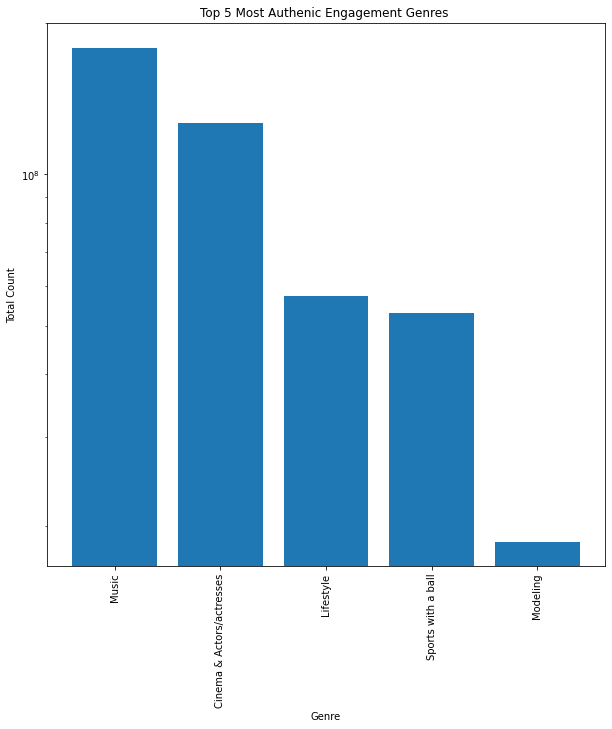

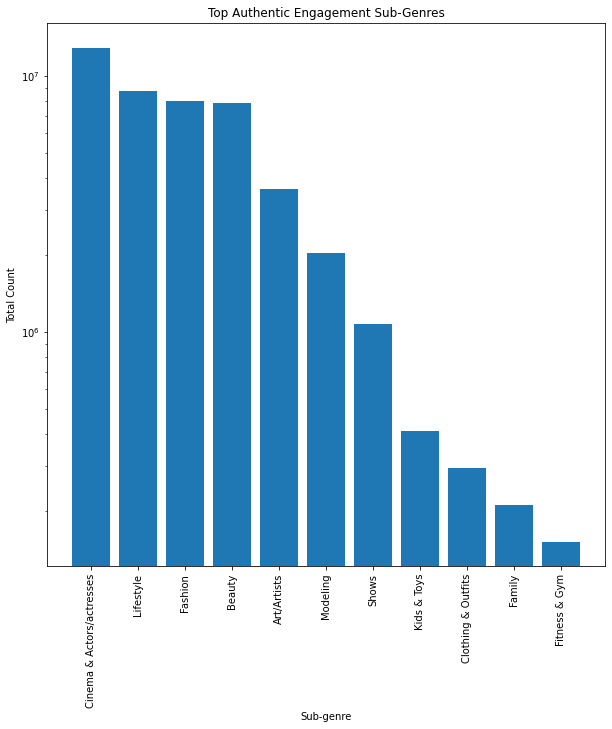

In [34]:
ig_totauthentic = pd.DataFrame(total_authentic.head(5))

plt.figure(figsize = (10,10))
plt.bar(ig_totauthentic.index, ig_totauthentic['Authentic Engagement'])
plt.xlabel('Genre')
plt.ylabel('Total Count')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.title('Top 5 Most Authenic Engagement Genres ')
plt.show()

ig_sub = df_insta.loc[df_insta['Genre'] == 'Music'].groupby('Sub Genre')['Authentic Engagement'].sum()
ig_subgenre = pd.DataFrame(ig_sub).sort_values('Authentic Engagement', ascending = False)
plt.figure(figsize = (10,10))
plt.bar(ig_subgenre.index, ig_subgenre['Authentic Engagement'])
plt.xlabel('Sub-genre')
plt.ylabel('Total Count')
plt.title('Top Authentic Engagement Sub-Genres')
plt.xticks(rotation = 90)
plt.yscale('log')

pass


**Insights:** Music is the most popular genre and prompts the most authentic engagement. Cinema & Actors/actresses have the highest total authentic engagement count in the music genre. However, this analysis might be inconclusive, given that there are 713 missing data points in sub-genre features. Consequently, the most popular sub-genre is likely incorrect due to insufficient sample size.

### 5. What type of video on Instagram prompts the most Average Engagement?

In [35]:
engage_feauture = df_insta.groupby(['Genre','Sub Genre'])['Engagement'].sum().sort_values(ascending = False)

#Pivot table grouping by genre and sub genre
InstaEngage_feauture = pd.pivot_table(df_insta, index = ['Genre','Sub Genre'], values = ['Engagement'], aggfunc=np.sum)
InstaEngage_feauture.sort_values(['Genre','Engagement'], ascending = True)
display(InstaEngage_feauture)


Engagement
Genre                     Sub Genre                            
Accessories & Jewellery   Clothing & Outfits              74300
Art/Artists               Beauty                         927900
                          Cinema & Actors/actresses      878400
                          Fashion                        741000
                          Shows                          192300
Beauty                    Art/Artists                   2000000
                          Cinema & Actors/actresses     1595600
                          Family                         426300
                          Lifestyle                     1906100
                          Modeling                      1263600
Cars & Motorbikes         Luxury                         801200
Cinema & Actors/actresses Art/Artists                    604400
                          Business & Careers             208100
                          Comics & sketches              465100
                          Family                         123500
                          Fashion                       9087300
                          Fitness & Gym                  396000
                          Humor & Fun & Happiness        817500
                          Lifestyle                     6393000
                          Modeling                     10503300
                          Music                         5377300
                          Photography                    376500
                          Shows                         1554200
Clothing & Outfits        Lifestyle                     2400000
                          Music                         1100000
                          Shopping & Retail               71800
Computers & Gadgets       Machinery & Technologies      1967700
                          Photography                    111200
Education                 Humor & Fun & Happiness        622400
Family                    Fashion                        463600
                          Finance & Economics            214200
                          Lifestyle                     3078100
                          Music                         1100000
                          Shows                          557500
                          Sports with a ball             641100
Fashion                   Beauty                        2900000
                          Cinema & Actors/actresses      743600
                          Clothing & Outfits              59700
                          Lifestyle                      564400
                          Modeling                     13165700
Finance & Economics       Business & Careers            2237400
Fitness & Gym             Lifestyle                     2300000
                          Shopping & Retail              175500
Humor & Fun & Happiness   Cinema & Actors/actresses     1400000
                          Clothing & Outfits            1200000
                          Lifestyle                      434300
Kids & Toys               Family                         372500
Lifestyle                 Art/Artists                   2337300
                          Beauty                        2143000
                          Business & Careers             289300
                          Cinema & Actors/actresses    10989700
                          Family                          92200
                          Fashion                       4080800
                          Modeling                      6534100
                          Music                         2303900
                          Photography                    215400
                          Shows                         4802700
                          Sports with a ball            2120700
Literature & Journalism   Shows                          570600
                          Trainers & Coaches             431400
Luxury                    Cars & Motorbikes              240500
Management & Marketin

#### Instagram: Total Engagement Count by Genre

In [36]:
Insta_subfeatures = pd.pivot_table(df_insta, index = ['Genre'], values = ['Engagement'], aggfunc = np.sum)
display(Insta_subfeatures.sort_values('Engagement', ascending = False).head(10))

,Engagement
Genre,
Music,250185898
Cinema & Actors/actresses,168972000
Lifestyle,80541100
Sports with a ball,74700200
Modeling,27326700
Shows,23533400
Fashion,18030100
Beauty,15663500
Humor & Fun & Happiness,10099100


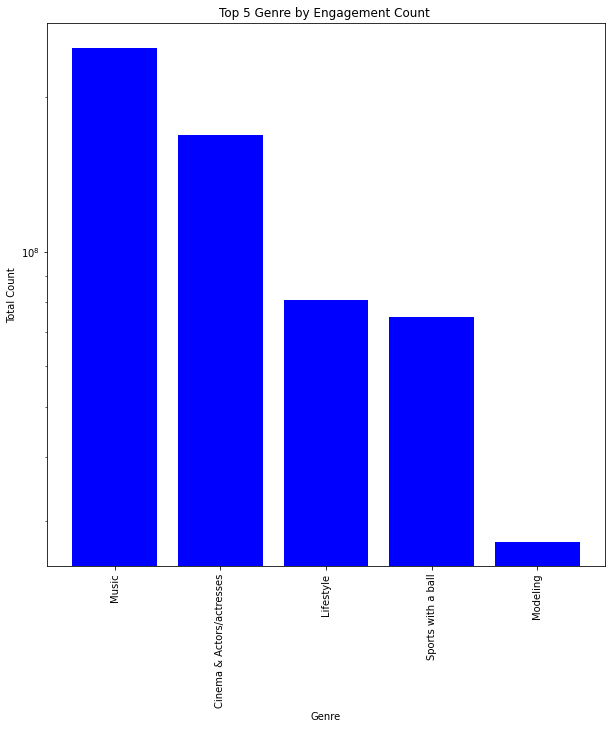

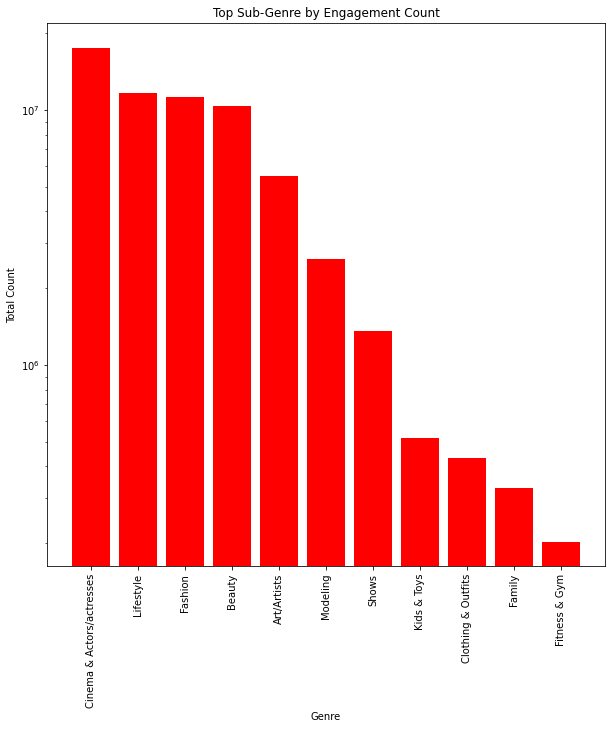

In [37]:
insta_avgEngage = df_insta.groupby('Genre')['Engagement'].sum()
insta_avgEngage1 = pd.DataFrame(insta_avgEngage).sort_values('Engagement',ascending = False).head(5)

plt.figure(figsize = (10,10))
plt.bar(insta_avgEngage1.index, insta_avgEngage1['Engagement'], color = 'blue')
plt.xlabel('Genre')
plt.ylabel('Total Count')
plt.yscale('log')
plt.title('Top 5 Genre by Engagement Count ')
plt.xticks(rotation = 90)

insta_subEngage = df_insta.loc[df_insta['Genre']=='Music']
insta_subEngage1 = insta_subEngage.groupby('Sub Genre')['Engagement'].sum()
insta_subEngage1 = pd.DataFrame(insta_subEngage1).sort_values('Engagement', ascending = False)

plt.figure(figsize = (10,10))
plt.bar(insta_subEngage1.index, insta_subEngage1['Engagement'], color = 'red')
plt.xlabel('Genre')
plt.ylabel('Total Count')
plt.yscale('log')
plt.title('Top Sub-Genre by Engagement Count')
plt.xticks(rotation = 90)
pass

**Insights:** Music is the most popular genre and prompts the highest engagement count. The most popular sub-genre within the Music genre is Cinema & Actors/actresses. However, this analysis might not be conclusive, given the sub-genre features contain a 713 null value. Consequently, the most popular sub-genre is likely incorrect due to insufficient sample size.

### 5. Which influencer category dominates the trending list for YouTube and Instagram?

In [38]:
insta_dominate = df_insta.groupby('Genre')['Followers'].sum().sort_values(ascending = False)
youtube_dominate = df_youtube.groupby('Genre')['Subscribers'].sum().sort_values(ascending = False)
print(f'{insta_dominate.index[0]} category with the total of {insta_dominate[0]} subscribers dominates the trending list for instagram.')
print(f'{youtube_dominate.index[0]} category with the total of {youtube_dominate[0]} followers dominates the trending list for youtube.')


Music category with the total of 7210899997 subscribers dominates the trending list for instagram.
Music & Dance category with the total of 3797100000 followers dominates the trending list for youtube.


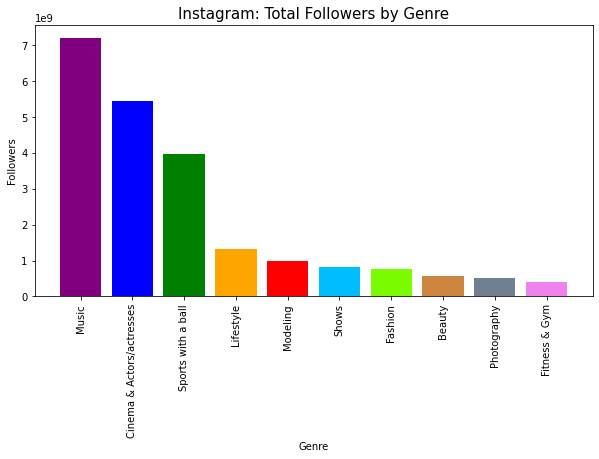

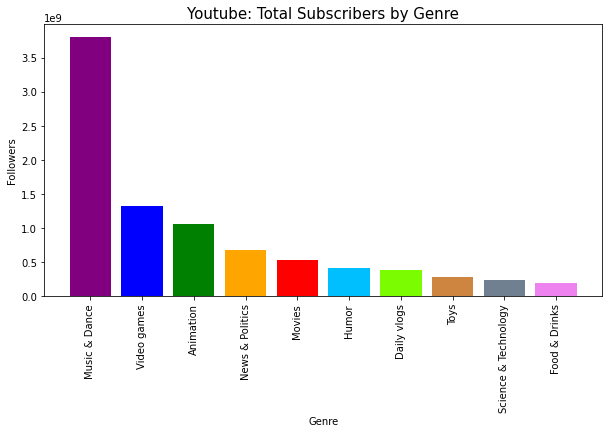

('Music', 'Cinema & Actors/actresses', 'Sports with a ball')

In [39]:
#Find top 10 influencer that dominates Youtube and Instagram
insta_dominate = pd.DataFrame(insta_dominate).head(10)
youtube_dominate = pd.DataFrame(youtube_dominate).head(10)

plt.figure(figsize = (10,5))
plt.bar(insta_dominate.index, insta_dominate['Followers'], color = ('purple', 'blue', 'green','orange','red','deepskyblue','lawngreen','peru','slategray','violet'))
#plt.bar(insta_dominate['Followers'], insta_dominate.index, color = ('purple', 'blue', 'green','orange','red','deepskyblue','lawngreen','peru','slategray','violet'))
plt.xlabel('Genre', fontsize = 10)
plt.ylabel('Followers', fontsize = 10)
#plt.yscale('log')
plt.title('Instagram: Total Followers by Genre', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize = (10,5))
plt.bar(youtube_dominate.index, youtube_dominate['Subscribers'], color = ('purple', 'blue', 'green','orange','red','deepskyblue','lawngreen','peru','slategray','violet'))
plt.xlabel('Genre')
plt.ylabel('Followers')
#plt.yscale('log')
plt.title('Youtube: Total Subscribers by Genre',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()
pass


**Insights:** Music is the most popular genre in Instagram. Music & Dance is the most popular genre in Youtube. 

### 6. Correlation Matrix of the Top 3 Genre

In [40]:
#Correlation matrix for each genre
youtube_uniqueGenre = df_youtube['Genre'].unique()
df_youtube.groupby('Genre').corr()

Subscribers     Views     Likes  Comments
Genre                                                                      
ASMR                 Subscribers     1.000000 -0.980465 -0.997562 -0.990531
                     Views          -0.980465  1.000000  0.991801  0.998185
                     Likes          -0.997562  0.991801  1.000000  0.997697
                     Comments       -0.990531  0.998185  0.997697  1.000000
Animals & Pets       Subscribers     1.000000  0.841489  0.813518  0.638024
                     Views           0.841489  1.000000  0.998286  0.952867
                     Likes           0.813518  0.998286  1.000000  0.966473
                     Comments        0.638024  0.952867  0.966473  1.000000
Animation            Subscribers     1.000000  0.129936  0.171695  0.201819
                     Views           0.129936  1.000000  0.901139  0.918708
                     Likes           0.171695  0.901139  1.000000  0.945167
                     Comments        0.201819  0.918708  0.945167  1.000000
Autos & Vehicles     Subscribers          NaN       NaN       NaN       NaN
                     Views                NaN       NaN       NaN       NaN
                     Likes                NaN       NaN       NaN       NaN
                     Comments             NaN       NaN       NaN       NaN
Beauty               Subscribers     1.000000  1.000000  1.000000 -1.000000
                     Views           1.000000  1.000000  1.000000 -1.000000
                     Likes           1.000000  1.000000  1.000000 -1.000000
                     Comments       -1.000000 -1.000000 -1.000000  1.000000
DIY & Life Hacks     Subscribers     1.000000  0.212115  0.318489  0.488024
                     Views           0.212115  1.000000  0.827510  0.547327
                     Likes           0.318489  0.827510  1.000000  0.819039
                     Comments        0.488024  0.547327  0.819039  1.000000
Daily vlogs          Subscribers     1.000000  0.615053  0.561826  0.684560
                     Views           0.615053  1.000000  0.980972  0.964127
                     Likes           0.561826  0.980972  1.000000  0.923471
                     Comments        0.684560  0.964127  0.923471  1.000000
Design/art           Subscribers     1.000000  0.964224  0.739346  0.930300
                     Views           0.964224  1.000000  0.891386  0.994252
                     Likes           0.739346  0.891386  1.000000  0.934790
                     Comments        0.930300  0.994252  0.934790  1.000000
Education            Subscribers     1.000000  0.459544  0.470006  0.401714
                     Views           0.459544  1.000000  0.959522  0.895646
                     Likes           0.470006  0.959522  1.000000  0.982127
                     Comments        0.401714  0.895646  0.982127  1.000000
Fashion              Subscribers     1.000000  0.408568 -0.235756  0.760756
                     Views           0.408568  1.000000  0.657486  0.685376
                     Likes          -0.235756  0.657486  1.000000  0.284280
                     Comments        0.760756  0.685376  0.284280  1.000000
Fitness              Subscribers     1.000000 -0.613097 -0.983562  0.980685
                     Views          -0.613097  1.000000  0.745671 -0.446733
                     Likes          -0.983562  0.745671  1.000000 -0.929245
                     Comments        0.980685 -0.446733 -0.929245  1.000000
Food & Drinks        Subscribers     1.000000  0.095330 -0.008033 -0.018790
                     Views           0.095330  1.000000  0.951047  0.956592
                     Likes          -0.008033  0.951047  1.000000  0.928040
                     Comments       -0.018790  0.956592  0.928040  1.000000
Health & Self Help   Subscribers     1.000000  1.000000  1.000000  1.000000
                     Views           1.000000  1.000000  1.000000  1.000000
                     Likes           1.000000  1.000000  1.000000  1.000000
      

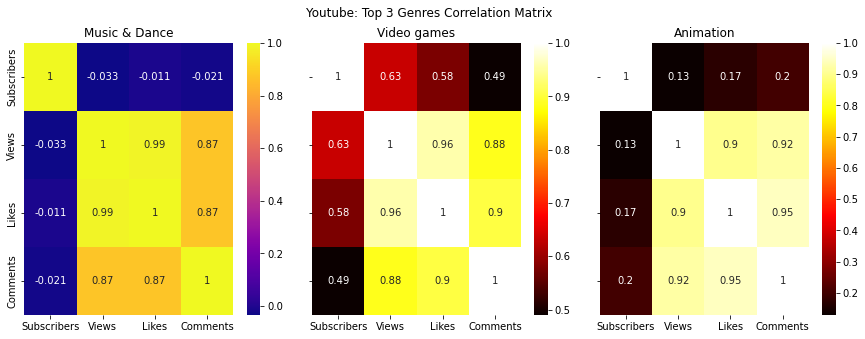

In [41]:
#Create a heatmap of the correlation matrix for youtube
music_Ycorr = df_youtube[df_youtube['Genre'] == 'Music & Dance'].corr()
games_Ycorr = df_youtube[df_youtube['Genre'] == 'Video games'].corr()
animation_Ycorr = df_youtube[df_youtube['Genre'] == 'Animation'].corr()
news_Ycorr = df_youtube[df_youtube['Genre'] == 'News & Politics'].corr()

fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5), sharey= True)
fig.subplots_adjust(wspace=0.1)
fig.suptitle('Youtube: Top 3 Genres Correlation Matrix')

sns.heatmap(music_Ycorr, cmap = "plasma",ax = ax1, annot = True,cbar = True)
ax1.set_title('Music & Dance')

sns.heatmap(games_Ycorr, cmap = "hot",ax= ax2, annot = True,cbar = True)
ax2.set_title('Video games')
#ax2.set_title('Cateogory Groupping')
sns.heatmap(animation_Ycorr, cmap = "hot",ax= ax3, annot = True,cbar = True)
ax3.set_title('Animation')

pass

In [42]:
df_youtube[df_youtube['Genre'] == 'Health & Self Help']

,youtuber name,channel name,Genre,Subscribers,Audience Country,Views,Likes,Comments
383,Dhar Mann,Dhar Mann,Health & Self Help,15000000,United States,6200000,140900,6300
767,Experienced Mojaraba TV,Experienced Mojaraba TV,Health & Self Help,10700000,United States,190700,5200,128


Text(0.5, 1.0, 'Sports Genre')

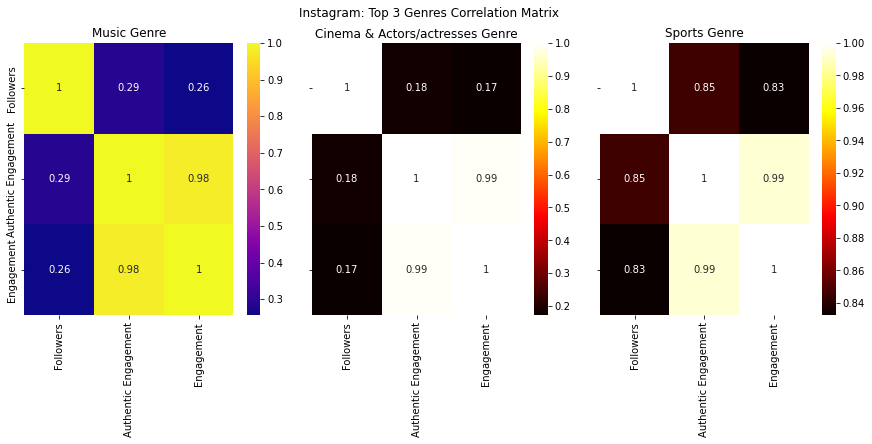

In [43]:
#Correlation matrix heatmap by genre for instagram

#'Music','Cinema & Actors/actresses', 'Sports with a ball'
music_Icorr = df_insta[df_insta['Genre'] == 'Music'].corr()
cinema_Icorr = df_insta[df_insta['Genre'] == 'Cinema & Actors/actresses'].corr()
sport_Icorr = df_insta[df_insta['Genre'] == 'Sports with a ball'].corr()

fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize = (15,5), sharey= True)
fig.subplots_adjust(wspace=0.1)
fig.suptitle('Instagram: Top 3 Genres Correlation Matrix')


sns.heatmap(music_Icorr, cmap = "plasma",ax = ax1, annot = True,cbar = True)
ax1.set_title('Music Genre')

sns.heatmap(cinema_Icorr, cmap = "hot",ax= ax2, annot = True,cbar = True)
ax2.set_title('Cinema & Actors/actresses Genre')
#ax2.set_title('Cateogory Groupping')
sns.heatmap(sport_Icorr, cmap = "hot",ax= ax3, annot = True,cbar = True)
ax3.set_title('Sports Genre')


**Insights:** The correlation coefficients between social engagement features across the top 3 genres remain highly correlated for Youtube and Instagram. However, the Video Game genre on Youtube seems to have a higher correlation between social engagement and followers. Given that the correlation coefficients range between 0.49 and 0.63, we cannot definitively say they are linearly dependent. <br>

Sports Genre on Instagram has a high correlation coefficient between social engagement and followers. The coefficient range from 0.83 to 0.85. These are highly correlated enough for us to assume that there is a reasonable linear relationship.<br>

The most important takeaway is that people are more inclined to engage socially than to follow or subscribe to a specific genre. While in some other genres, they are more likely to engage socially and follow or subscribe to that channel. 

### 6. Do influencers with more followers tend to have more engagement e.g. likes, comments?

In [44]:
# Youtube
youtube_influencer = df_youtube[['youtuber name','channel name', 'Subscribers','Views','Likes','Comments']].sort_values('Subscribers', ascending = False)
youtube_influencer[youtube_influencer['Views'] == np.max(youtube_influencer['Views'])].index
max_features = youtube_influencer[youtube_influencer['Views'] == np.max(youtube_influencer['Views'])]
max_features[max_features.columns[0]].to_string(index= False)

'Bizarrap'

In [45]:
display(df_youtube.head(1))
display(df_tiktok.head(1))
display(df_insta.head(1))

#Visualization:
    #Stacked barchart for users? (subscribers, avg views, likes, comments...etcs)

,youtuber name,channel name,Genre,Subscribers,Audience Country,Views,Likes,Comments
0,tseries,T-Series,Music & Dance,212100000,India,323700,9800,290


,Tiktoker name,Tiktok name,Subscribers,Views,Likes,Comments,Shares
0,ekin.721,MOMO’s,221700,26000000,2800000,29400,116400


,Influencer name,Instagram name,Genre,Sub Genre,Followers,Audience Country,Authentic Engagement,Engagement
0,433,433,Sports with a ball,NaN,48500000,Spain,383100,637000


In [46]:
#Find the top 5 infleuncers with highest avg views, likes, comments, and subscriber in each platform
# 
def topFive (df, features):
    top_rank = df.sort_values(features, ascending= False).head(3)
    return top_rank
    
youtube_sub = topFive(df_youtube, 'Subscribers')
youtube_likes = topFive(df_youtube, 'Likes')
youtube_views = topFive(df_youtube, 'Views')
youtube_comments = topFive(df_youtube, 'Comments')

tiktok_sub = topFive(df_tiktok, 'Subscribers')
tiktok_views = topFive(df_tiktok, 'Views')
tiktok_likes = topFive(df_tiktok, 'Likes')
tiktok_comment = topFive(df_tiktok, 'Comments')
tiktok_share = topFive(df_tiktok, 'Shares')

insta_follow = topFive(df_insta, 'Followers')
insta_Aengage = topFive(df_insta, 'Authentic Engagement')
insta_Eengage = topFive(df_insta, 'Engagement')

con_youtube = pd.concat([youtube_sub,youtube_views,youtube_likes,youtube_comments])
copy_youtube = con_youtube.copy()
copy_youtube.drop_duplicates(keep = 'first', inplace = True)
copy_youtube.sort_values('Subscribers', ascending = False,inplace=True)

con_tiktok = pd.concat([tiktok_sub,tiktok_views,tiktok_likes,tiktok_comment,tiktok_share])
copy_tiktok = con_tiktok.copy()
copy_tiktok.drop_duplicates(keep = 'first', inplace = True)
copy_tiktok.sort_values('Subscribers', ascending = False,inplace=True)

con_insta = pd.concat([insta_follow,insta_Aengage,insta_Eengage])
copy_insta = con_insta.copy()
copy_insta.drop_duplicates(keep = 'first', inplace = True)
copy_insta.sort_values('Followers', ascending = False,inplace=True)

<Figure size 360x360 with 0 Axes>

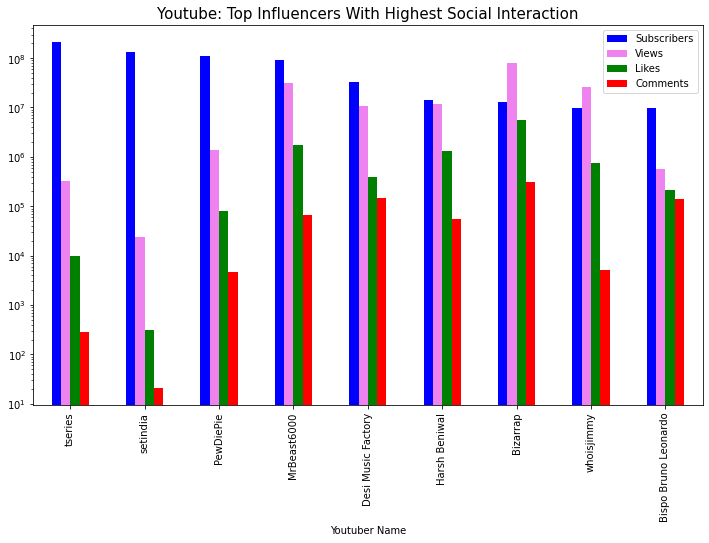

,Influencer name,Instagram name,Genre,Sub Genre,Followers,Audience Country,Authentic Engagement,Engagement
0,433,433,Sports with a ball,NaN,48500000,Spain,383100,637000
1,__youngbae__,TAEYANG,Music,NaN,12700000,Indonesia,478000,542300
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18800000,Russia,310800,377900
3,_imyour_joy,Joy,Lifestyle,NaN,13500000,Indonesia,1100000,1400000
4,_jeongjaehyun,Jaehyun,NaN,NaN,11100000,Indonesia,2500000,3100000


In [47]:
plt.figure(figsize = (5,5))
copy_youtube.plot(x = 'youtuber name',y = ['Subscribers','Views','Likes','Comments'], kind = 'bar', color = ('blue', 'violet', 'green','red'),figsize = (12,7))
plt.yscale('log')
plt.title('Youtube: Top Influencers With Highest Social Interaction', fontsize = 15)
plt.xlabel('Youtuber Name')
plt.xticks(fontsize = 10)
plt.show()

#Do all influencer have one or multiple genres?
df_insta.head(5)

Text(0.5, 0, 'TikToker Name')

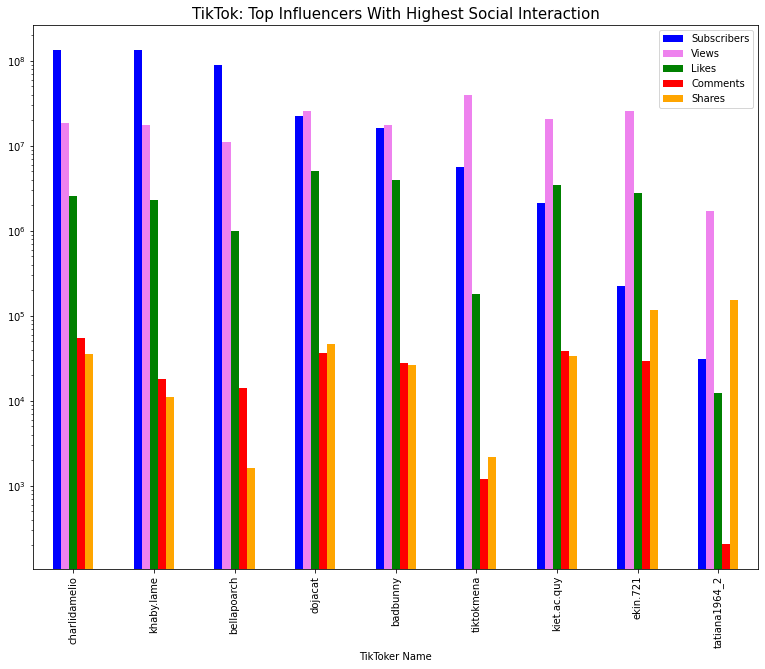

In [48]:

copy_tiktok.plot(x ='Tiktoker name',y = ['Subscribers','Views','Likes','Comments','Shares'], kind='bar',color = ('blue', 'violet', 'green','red', 'orange'),figsize = (13,10))
plt.yscale('log')
plt.title('TikTok: Top Influencers With Highest Social Interaction', fontsize = 15)
plt.xlabel('TikToker Name')

<Figure size 720x720 with 0 Axes>

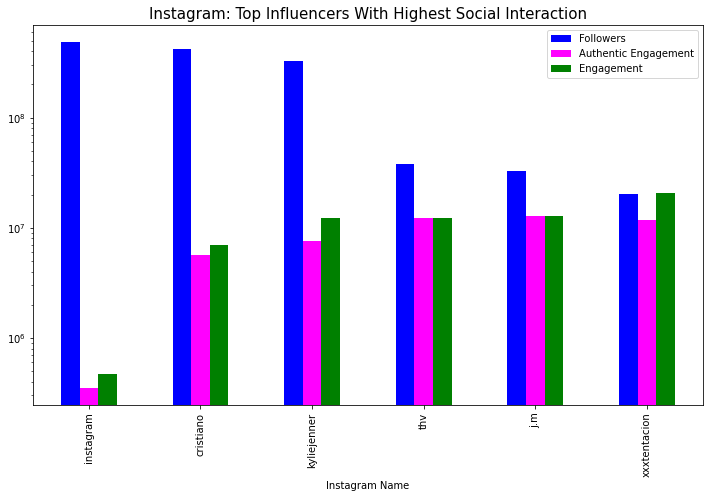

In [49]:
plt.figure(figsize = (10,10))
copy_insta.plot(x = 'Influencer name',y = ['Followers','Authentic Engagement','Engagement'], kind = 'bar',color = ('blue', 'magenta', 'green'), figsize = (12,7))
plt.yscale('log')
plt.title('Instagram: Top Influencers With Highest Social Interaction',fontsize = 15)
plt.xlabel('Instagram Name')
plt.show()

In [50]:
def feature_count(df,features_list,follow):
    for i in features_list:
        max_features = df[df[i] == np.max(df[i])]
        influencer_name = max_features[max_features.columns[0]].to_string(index=False)
        followers = max_features[follow].to_string(index = False)
        feature_count = max_features[i].to_string(index = False)
        print(f'Influencer: {influencer_name}, with {followers} {follow} have the highest {i} of {feature_count}.')
    return 

#feature_count(df_youtube,['avg views','avg likes','avg comments'],'Subscribers')
    

In [51]:
#Youtube
feature_count(df_youtube,['Views','Likes','Comments'],'Subscribers')


Influencer: Bizarrap, with 13100000 Subscribers have the highest Views of 80500000.
Influencer: Bizarrap, with 13100000 Subscribers have the highest Likes of 5600000.
Influencer: Bizarrap, with 13100000 Subscribers have the highest Comments of 313600.


In [52]:
#Instagram
df_insta.head(1)
feature_count(df_insta,['Authentic Engagement','Engagement'],'Followers')


Influencer: j.m, with 32700000 Followers have the highest Authentic Engagement of 12700000.
Influencer: xxxtentacion, with 20200000 Followers have the highest Engagement of 20800000.


In [53]:
feature_count(df_tiktok,['Views','Likes','Comments','Shares'],'Subscribers')

Influencer: tiktokmena, with 5700000 Subscribers have the highest Views of 39500000.
Influencer: dojacat, with 22200000 Subscribers have the highest Likes of 5000000.
Influencer: charlidamelio, with 135400000 Subscribers have the highest Comments of 54700.
Influencer: tatiana1964_2, with 31000 Subscribers have the highest Shares of 151800.


**Insights:** No, an influencer with more followers does not always have the highest social interaction across the three platforms. Depending on their genre, some channels will have higher social interaction, such as likes, shares, comments, and views, than their total followers or subscribers. Additionally, We have to consider that some channels have their comments section disabled. This could also result in lower authentic engagement and engagement count for some influencers on Instagram. 

In [55]:
top_30YInfluencer = df_youtube[['youtuber name','Subscribers','Genre']].sort_values('Subscribers', ascending = False).head(30)
top_30IInfluencer = df_insta[['Influencer name','Followers','Genre']].sort_values('Followers', ascending = False).head(30)
#display(top_30YInfluencer, top_30IInfluencer)

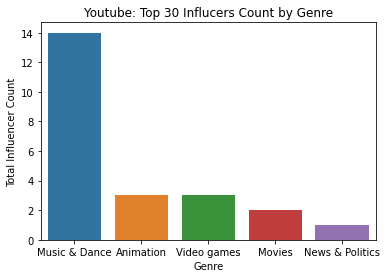

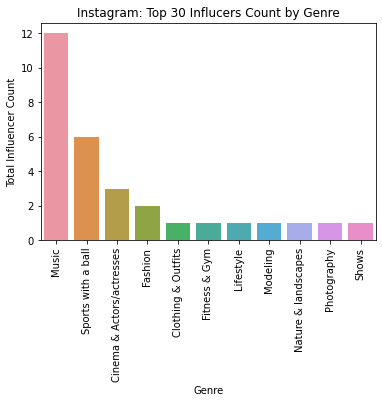

In [56]:
genre_30YInfleuncer=top_30YInfluencer.groupby('Genre')['youtuber name'].count().sort_values(ascending = False)
genre_30IInfluencer=top_30IInfluencer.groupby('Genre')['Influencer name'].count().sort_values(ascending = False)
genre_30Y = pd.DataFrame(genre_30YInfleuncer).reset_index().rename(columns = {'youtuber name':'Count'})
genre_30I = pd.DataFrame(genre_30IInfluencer).reset_index().rename(columns = {'Influencer name':'Count'})

sns.barplot(x = 'Genre', y = 'Count', data = genre_30Y)
plt.title('Youtube: Top 30 Influcers Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Influencer Count')
plt.show()

sns.barplot(x = 'Genre', y = 'Count', data = genre_30I)
plt.title('Instagram: Top 30 Influcers Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Influencer Count')
plt.xticks(rotation = 90)
plt.show()



**Insights:** Among the top 30 influencers on Youtube, 14 influencers' channels are Music & Dance. And 12 out of 30 influencers' channels on Instagram is Music. 

### **Data Sources:**
**TikTok Trending Track:**<br>
Edward. “Top Tiktok Tracks.” Kaggle, Kaggle, 20 Apr. 2022, https://www.kaggle.com/code/eharian1/top-tiktok-tracks/data

**TikTok Trending Video:**<br>
Ven, Erik van de. “TikTok Trending Videos.” Kaggle, Kaggle, 27 Mar. 2021, https://www.kaggle.com/datasets/erikvdven/tiktok-trending-december-2020

**Social Media Influencers:**<br>
Maurya, Ram Jas. “Social Media Influencers.” Kaggle, 25 June 2022, https://www.kaggle.com/datasets/ramjasmaurya/top-1000-social-media-channels